# **Proyecto BD Softtronics Solutions S.A**
***Oscar David Ulloa Borja 2180395***
# Absentismo laboral y liquidacion de empleados
**Liquidacion de empleados y horas laborales**

Para este proyecto se contacto con la empresa Softtronic Solutions S.A para proponer un analisis exploratorio de datos a uno de sus software para registros de empleados de empresas.

La empresa brindo una base de datos comleta en formato SQL en la cual mostraba todo el funcionamiento del software en cuanto a estructura de registro y calculo de liquidaciones para empleados.



# 1. Preparacion de la base de datos en SQL

Inicialmente se comenzo a trabajar con la herramienta SQL Server Management Service 2019 (SSMS) en donde se tuvo acceso completo a estructura de la base de datos tanto en forma de diagrama como en las tablas que la componian.

La base de datos completa esta compuesta por **408 tablas**, **153274 registros**  y multiples componentes de la programacion del software por lo que fue necesario definir inicialmente que se trataba de registros de datos y que se trataba de registros del sistema.

El siguiente codigo ejecutado en SQL fue el utilizado para poder revisar las tablas, verificar los datos y poder eliminar aquellas columnas que inicialmetne se descartaron para poder extraer los elementos (Tablas) reelevantes para el proyecto.

SELECT *
FROM programacion --Seleccion de tablas

SELECT ;  
FROM programacion  --Seleccion de columnas

UPDATE programacion
SET  = NULL         --Anular datos

ALTER TABLE programacion
DROP COLUMN DescripcionUnidad;  --Eliminacion de columnas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Se exportaron los elementos de SQL a Excel para posteriormente cargarlos en el entorno virtual de Google Colab y asi trabajarlo de manera sencilla en Python.

In [ ]:
empleados = '/tablaem.xls'
liquidacion = '/tablaliq.xls'
programacion = '/tablaprog.xls'

In [ ]:
dfemp = pd.read_excel(empleados)
dfliq = pd.read_excel(liquidacion)
dfprog = pd.read_excel(programacion)

Se inicia la limpieza y verificacion de datos de la tabla de programacion ya que esta es la tabla central donde se unen aspectos de las otras dos y contiene elementos netamente de la funcion del software por lo que es importante sacar solo las columnas pertinentes para el analisis objetivo

In [ ]:
dfprog

,IdProgramacion,IdEmpleado,IdTurno,IdObservacion,IdEvento,Fecha,NumeroMinACompensar,FechaACompensar,NumeroMinutosExtraEntrada,PreautorizacionMinutosExtraEntrada,...,HoraInicioPermiso4,HoraFinPermiso4,PagarSinMarcaciones,IdPermiso_Original,IdPermiso5,HoraInicioPermiso5,HoraFinPermiso5,IdPermiso6,HoraInicioPermiso6,HoraFinPermiso6
0,1385,59,17.0,NaN,NaN,2021-02-05,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1386,59,18.0,NaN,NaN,2021-02-06,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1387,59,18.0,NaN,NaN,2021-02-13,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393,59,19.0,NaN,NaN,2021-12-16,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1396,59,18.0,NaN,NaN,2022-02-01,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,3291,85,17.0,NaN,NaN,2023-09-30,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,3292,75,17.0,NaN,NaN,2023-09-30,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1451,3293,73,17.0,NaN,NaN,2023-09-30,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,3294,85,19.0,NaN,NaN,2023-08-16,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De igual manera se comprueba la informacion de todas las tablas antes de empezar

In [ ]:
print(dfemp.info())
print()
print(dfliq.info())
print()
print(dfprog.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Columns: 218 entries, IdEmpleado to Convencionado_AplicaLiquidacion
dtypes: datetime64[ns](9), float64(100), int64(109)
memory usage: 88.7 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Columns: 157 entries, IdLiquidacion to IdPermiso6
dtypes: datetime64[ns](5), float64(124), int64(25), object(3)
memory usage: 2.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Columns: 139 entries, IdProgramacion to HoraFinPermiso6
dtypes: datetime64[ns](9), float64(98), int64(29), object(3)
memory usage: 1.5+ MB
None


Se verifican las columnas con valores nulos totales para luego simplificar esta tabla eliminandolos

In [ ]:
columnas_con_nulos = dfprog.columns[dfprog.isnull().any()]
nulos_por_columna = dfprog[columnas_con_nulos].isnull().sum()
print("Cantidad de valores nulos por columna:")
print(nulos_por_columna)

Cantidad de valores nulos por columna:
IdTurno                 145
IdObservacion          1454
IdEvento               1454
NumeroMinACompensar    1454
FechaACompensar        1454
                       ... 
HoraInicioPermiso5     1454
HoraFinPermiso5        1454
IdPermiso6             1454
HoraInicioPermiso6     1454
HoraFinPermiso6        1454
Length: 106, dtype: int64


Se eliminan las columnas de datos nulos mayores al 90% del total de registros, esto con el fin de conservar algunas que tienen valores de reelevancia mas adelante.

In [ ]:
vnulos = 1310 ##Corresponde a proximadamente el 90% de datos de las columnas
nulos_columna = dfprog.isnull().sum()

columnasnull = nulos_columna[nulos_columna > vnulos].index

dfp = dfprog.drop(columns=columnasnull)

print(dfprog.info())
print(f"Dataframe limpio")
print(dfp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Columns: 139 entries, IdProgramacion to HoraFinPermiso6
dtypes: datetime64[ns](9), float64(98), int64(29), object(3)
memory usage: 1.5+ MB
None
Dataframe limpio
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454 entries, 0 to 1453
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   IdProgramacion                       1454 non-null   int64         
 1   IdEmpleado                           1454 non-null   int64         
 2   IdTurno                              1309 non-null   float64       
 3   Fecha                                1454 non-null   datetime64[ns]
 4   NumeroMinutosExtraEntrada            1454 non-null   int64         
 5   PreautorizacionMinutosExtraEntrada   1454 non-null   int64         
 6   AutorizacionMinutosExtraEntrada      1454 non-null   int64         
 

Como podemos observar, ahora la informacion en el dataframe correspondiente a la programacion es mucho mas manejable.

En este punto se convoco a una reunion con la empresa para verificar las columnas que son parte de la programacion del sistmea ya que estas solo son importantes para la funcion del mismo y no para la base de datos como tal dando como resultado la seleccion de las siguientes columnas:

In [ ]:
ndfprog = dfp[["IdProgramacion","IdTurno","Fecha","HoraInicioPermiso","HoraFinPermiso","FechaCompensatorio"]]
ndfprog

,IdProgramacion,IdTurno,Fecha,HoraInicioPermiso,HoraFinPermiso,FechaCompensatorio
0,1385,17.0,2021-02-05,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
1,1386,18.0,2021-02-06,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
2,1387,18.0,2021-02-13,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
3,1393,19.0,2021-12-16,2021-12-16 09:00:00,2021-12-16 10:00:00,1900-01-01
4,1396,18.0,2022-02-01,2022-02-01 14:00:00,2022-02-01 16:00:00,1900-01-01
...,...,...,...,...,...,...
1449,3291,17.0,2023-09-30,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
1450,3292,17.0,2023-09-30,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
1451,3293,17.0,2023-09-30,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
1452,3294,19.0,2023-08-16,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01


Revision de la tabla dfliq correspondiente a la liquidacion

In [ ]:
dfliq

,IdLiquidacion,IdEmpleado,IdTurno,IdPermiso,Seleccionado,Fecha,Descripcion,TipoDeDescripcion,MarcacionEntrada,MarcacionSalida,...,HEND,IdPermiso3,IdPermiso4,EsProgramacionDinamica,HED_Convencionado,HEN_Convencionado,HEDF_Convencionado,HENF_Convencionado,IdPermiso5,IdPermiso6
0,2695,59,17.0,NaN,NaN,2021-02-05,22:00 - 06:00,2,22:00,06:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2696,59,18.0,NaN,NaN,2021-02-06,14:00 - 22:00,2,14:00,22:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2697,59,NaN,NaN,NaN,2021-02-06,Dominical Remunerado,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2698,59,NaN,NaN,NaN,2021-02-07,Fecha no Programada. (Domingo),4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2699,59,18.0,NaN,NaN,2021-02-13,14:00 - 22:00,2,14:00,22:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,707204,72,NaN,11.0,NaN,2024-02-23,PERMISO VACACIONAL,10,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2066,707205,72,NaN,NaN,NaN,2024-02-24,Fecha no Programada.,4,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2067,707206,72,NaN,NaN,NaN,2024-02-25,Dominical Remunerado,6,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2068,707207,72,44.0,NaN,NaN,2024-02-26,TurnoG 21:00 - 06:00,2,19:45,06:00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En esta tabla se saltara el proceso de eliminar nulos ya que se tiene mas claro las columnas reelevantes para el proyecto las cuales tienen informacion de los empleados, turnos y tiempos.

NOTA: Las columnas "H-XYZ" corresponden a Horas definidas en liquidacion.

In [ ]:
ndfliq = dfliq[["IdLiquidacion","IdEmpleado","IdTurno","IdPermiso","Fecha","Descripcion","TipoDeDescripcion","MarcacionEntrada","MarcacionSalida","HTRAB","HO","HDES","HED","HEN","HEDF","HENF","RN","TempDomLab","HRET","HSANT","HOPermisoRemunerado"]]
ndfliq

,IdLiquidacion,IdEmpleado,IdTurno,IdPermiso,Fecha,Descripcion,TipoDeDescripcion,MarcacionEntrada,MarcacionSalida,HTRAB,...,HDES,HED,HEN,HEDF,HENF,RN,TempDomLab,HRET,HSANT,HOPermisoRemunerado
0,2695,59,17.0,NaN,2021-02-05,22:00 - 06:00,2,22:00,06:00,8.00,...,0.0,0.0,0.0,0.0,0,8.0,360.0,0.0,0.0,0.0
1,2696,59,18.0,NaN,2021-02-06,14:00 - 22:00,2,14:00,22:00,8.00,...,0.0,0.0,0.0,0.0,0,0.0,480.0,0.0,0.0,0.0
2,2697,59,NaN,NaN,2021-02-06,Dominical Remunerado,6,NaN,NaN,0.00,...,0.0,0.0,0.0,0.0,0,0.0,NaN,0.0,0.0,0.0
3,2698,59,NaN,NaN,2021-02-07,Fecha no Programada. (Domingo),4,NaN,NaN,0.00,...,0.0,0.0,0.0,0.0,0,0.0,NaN,0.0,0.0,0.0
4,2699,59,18.0,NaN,2021-02-13,14:00 - 22:00,2,14:00,22:00,8.00,...,0.0,0.0,0.0,0.0,0,0.0,480.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,707204,72,NaN,11.0,2024-02-23,PERMISO VACACIONAL,10,NaN,NaN,0.00,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,7.5
2066,707205,72,NaN,NaN,2024-02-24,Fecha no Programada.,4,NaN,NaN,0.00,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2067,707206,72,NaN,NaN,2024-02-25,Dominical Remunerado,6,NaN,NaN,0.00,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2068,707207,72,44.0,NaN,2024-02-26,TurnoG 21:00 - 06:00,2,19:45,06:00,10.25,...,0.0,0.0,3.0,0.0,0,6.0,0.0,0.0,0.0,0.0


Por ultimo la tabla de empleados la cual solo se obtendran las columnas con la informacion de empleados para verificacion con las anteriores.

NOTA: El nombre, Apellido, Cedula y otros factores personales han sido eliminados para mantener el anonimato de los empleados dejando solo el identificador correspondiente de la empresa a la que esta vinculado.


In [ ]:
dfemp

,IdEmpleado,IdEmpresa,IdDepartamento,IdSucursal,IdPlanta,IdCargo,IdCentroCosto,IdTerritorio,IdClasificacionAdicional,TiempoGraciaEntrada,...,IsCFacturaPermiteDescuentoNomina,Is_Self_AllowFacial,Is_Self_AllowFacial_Mobile,PagarHEM,PagarHEMA,IsLiquidacion,PagarHEDD,PagarHEND,JobSite_AplicaRotacion,Convencionado_AplicaLiquidacion
0,52,6,NaN,NaN,NaN,1.0,13.0,NaN,NaN,15,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,0.0,NaN
1,53,1,NaN,NaN,NaN,1.0,2.0,NaN,NaN,15,...,0.0,0.0,0.0,0.0,0.0,-1,0.0,0.0,0.0,NaN
2,54,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
3,55,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
4,56,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
5,57,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
6,58,1,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
7,59,1,1.0,2.0,1.0,1.0,3.0,1.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN
8,60,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,NaN,NaN,-1,NaN,NaN,NaN,NaN
9,61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0.0,0.0,0.0,NaN,NaN,-1,NaN,NaN,NaN,NaN


Se seleccionaron las dos tablas que contienen informacion directa sobre los empleados

In [ ]:
ndfemp = dfemp[["IdEmpleado","IdEmpresa"]]
ndfemp

,IdEmpleado,IdEmpresa
0,52,6
1,53,1
2,54,1
3,55,1
4,56,1
5,57,1
6,58,1
7,59,1
8,60,1
9,61,1


Para continuar, primero se verificaron los nuevos dataFrames y su contenido

In [ ]:
print(ndfemp.info())
print()
print(ndfliq.info())
print()
print(ndfprog.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   IdEmpleado  52 non-null     int64
 1   IdEmpresa   52 non-null     int64
dtypes: int64(2)
memory usage: 960.0 bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   IdLiquidacion        2070 non-null   int64         
 1   IdEmpleado           2070 non-null   int64         
 2   IdTurno              410 non-null    float64       
 3   IdPermiso            53 non-null     float64       
 4   Fecha                2070 non-null   datetime64[ns]
 5   Descripcion          2070 non-null   object        
 6   TipoDeDescripcion    2070 non-null   int64         
 7   MarcacionEntrada     324 non-null    object        
 8   MarcacionSa

Ya habiendo verificado las tablas, se realiza la union de las tres tablas para formas el dataframe completo con el cual trabajar.

In [ ]:
dfunion = pd.merge(ndfemp, ndfliq, on=['IdEmpleado'], how='left')

df0 = pd.merge(dfunion, ndfprog, on=['IdTurno', 'Fecha'], how='left')
df0

,IdEmpleado,IdEmpresa,IdLiquidacion,IdTurno,IdPermiso,Fecha,Descripcion,TipoDeDescripcion,MarcacionEntrada,MarcacionSalida,...,HENF,RN,TempDomLab,HRET,HSANT,HOPermisoRemunerado,IdProgramacion,HoraInicioPermiso,HoraFinPermiso,FechaCompensatorio
0,52,6,2714.0,18.0,NaN,2022-02-04,14:00 - 22:00,2.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,2022-02-04 14:00:00,2022-02-04 15:00:00,1900-01-01
1,52,6,2714.0,18.0,NaN,2022-02-04,14:00 - 22:00,2.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1404.0,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
2,52,6,2718.0,NaN,NaN,2022-02-05,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
3,52,6,2724.0,NaN,NaN,2022-02-06,Dominical Remunerado,6.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
4,52,6,2728.0,NaN,NaN,2022-02-01,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,102,10,706033.0,NaN,NaN,2023-10-28,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2581,102,10,706034.0,NaN,NaN,2023-10-29,Fecha no Programada. (Domingo),4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2582,102,10,706035.0,NaN,NaN,2023-10-30,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2583,102,10,706036.0,NaN,NaN,2023-10-31,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   IdEmpleado           2585 non-null   int64         
 1   IdEmpresa            2585 non-null   int64         
 2   IdLiquidacion        2575 non-null   float64       
 3   IdTurno              791 non-null    float64       
 4   IdPermiso            70 non-null     float64       
 5   Fecha                2575 non-null   datetime64[ns]
 6   Descripcion          2575 non-null   object        
 7   TipoDeDescripcion    2575 non-null   float64       
 8   MarcacionEntrada     676 non-null    object        
 9   MarcacionSalida      676 non-null    object        
 10  HTRAB                2575 non-null   float64       
 11  HO                   2575 non-null   float64       
 12  HDES                 2575 non-null   float64       
 13  HED                  2575 non-nul

Ya con la base de datos final se puede empezar a trabajar en la imputacion de datos y limpieza de la misma.

Se inicio con la eliminacion de algunas filas en base a las instrucciones dadas por la empresa de si se cumplian dos condiciones (Idpermiso es diferente a null y el Idturno es null), dicho empleado debia ser eliminado de la base de datos.


In [ ]:
df = df0.copy()
condicion1 = df['IdPermiso'].notnull()
condicion2 = df['IdTurno'].isnull()

df = df.loc[~(condicion1 & condicion2)]

df

,IdEmpleado,IdEmpresa,IdLiquidacion,IdTurno,IdPermiso,Fecha,Descripcion,TipoDeDescripcion,MarcacionEntrada,MarcacionSalida,...,HENF,RN,TempDomLab,HRET,HSANT,HOPermisoRemunerado,IdProgramacion,HoraInicioPermiso,HoraFinPermiso,FechaCompensatorio
0,52,6,2714.0,18.0,NaN,2022-02-04,14:00 - 22:00,2.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1400.0,2022-02-04 14:00:00,2022-02-04 15:00:00,1900-01-01
1,52,6,2714.0,18.0,NaN,2022-02-04,14:00 - 22:00,2.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1404.0,1900-01-01 00:00:00,1900-01-01 00:00:00,1900-01-01
2,52,6,2718.0,NaN,NaN,2022-02-05,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
3,52,6,2724.0,NaN,NaN,2022-02-06,Dominical Remunerado,6.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
4,52,6,2728.0,NaN,NaN,2022-02-01,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,102,10,706033.0,NaN,NaN,2023-10-28,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2581,102,10,706034.0,NaN,NaN,2023-10-29,Fecha no Programada. (Domingo),4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2582,102,10,706035.0,NaN,NaN,2023-10-30,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT
2583,102,10,706036.0,NaN,NaN,2023-10-31,Fecha no Programada.,4.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaT,NaT,NaT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2524 entries, 0 to 2584
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   IdEmpleado           2524 non-null   int64         
 1   IdEmpresa            2524 non-null   int64         
 2   IdLiquidacion        2514 non-null   float64       
 3   IdTurno              791 non-null    float64       
 4   IdPermiso            9 non-null      float64       
 5   Fecha                2514 non-null   datetime64[ns]
 6   Descripcion          2514 non-null   object        
 7   TipoDeDescripcion    2514 non-null   float64       
 8   MarcacionEntrada     676 non-null    object        
 9   MarcacionSalida      676 non-null    object        
 10  HTRAB                2514 non-null   float64       
 11  HO                   2514 non-null   float64       
 12  HDES                 2514 non-null   float64       
 13  HED                  2514 non-null   f

En este punto se verifican los datos que esten completamente vacios para las variables de interes

In [ ]:
datos_nulos = df[(df['Descripcion'].isnull()) & (df['HoraInicioPermiso'].isnull())]

print(datos_nulos)

      IdEmpleado  IdEmpresa  IdLiquidacion  IdTurno  IdPermiso Fecha  \
260           56          1            NaN      NaN        NaN   NaT   
576           63          1            NaN      NaN        NaN   NaT   
1279          70          3            NaN      NaN        NaN   NaT   
1280          71          3            NaN      NaN        NaN   NaT   
2547          96          6            NaN      NaN        NaN   NaT   
2548          97          9            NaN      NaN        NaN   NaT   
2549          98          9            NaN      NaN        NaN   NaT   
2550          99          9            NaN      NaN        NaN   NaT   
2551         100         10            NaN      NaN        NaN   NaT   
2552         101         10            NaN      NaN        NaN   NaT   

     Descripcion  TipoDeDescripcion MarcacionEntrada MarcacionSalida  ...  \
260          NaN                NaN              NaN             NaN  ...   
576          NaN                NaN              NaN 

Como faltan pocos datos y son columnas de importancia, se realizo la consulta a la empresa de los empleados para eliminarlos ya que no tienen registros en ninguna variable

In [ ]:
empleadosnull = [260, 576, 1279,1280,2547,2548,2549,2550,2551,2552]
df = df.drop(empleadosnull)

Verificamos que se hayan eliminado los registros correctos

In [ ]:
datos_nulos = df[(df['Descripcion'].isnull()) & (df['HoraInicioPermiso'].isnull())]

print(datos_nulos)

Empty DataFrame
Columns: [IdEmpleado, IdEmpresa, IdLiquidacion, IdTurno, IdPermiso, Fecha, Descripcion, TipoDeDescripcion, MarcacionEntrada, MarcacionSalida, HTRAB, HO, HDES, HED, HEN, HEDF, HENF, RN, TempDomLab, HRET, HSANT, HOPermisoRemunerado, IdProgramacion, HoraInicioPermiso, HoraFinPermiso, FechaCompensatorio]
Index: []

[0 rows x 26 columns]


Postriomente se revisa la cplumna "Descripcion" por medio de variables unicas para verificar si hay datos atipicos o mal escritos

In [ ]:
recuento_valores = df['Descripcion'].value_counts()
recuento_valores

Descripcion
Fecha no Programada.                                                         1277
06:00 - 14:00                                                                 344
14:00 - 22:00                                                                 199
Fecha no Programada. (Domingo)                                                186
22:00 - 06:00                                                                  87
Dominical Remunerado                                                           67
Se presenta inconsistencia.                                                    64
Liquidación sin programación                                                   54
14:00 - 22:00 (Domingo)                                                        39
6:00 - 18:00                                                                   29
06:00 - 14:00 (Domingo)                                                        26
08:00 - 18:00                                                                  23
TURN

Como se puede observar, en la Descripcion que nos da informacion sobre el turno y dia que se hizo, presenta mucha variabilidad frente a como se registraron los datos, por lo que se hacen las correcciones pertinentes a un formato mas manejable y entendible para su analisis.

In [ ]:
correcciones = {
    'Fecha no Programada. (Domingo)': 'FNP(DOM)',
    'Dominical Remunerado': 'Dom Rem',
    'Se presenta inconsistencia.': 'inconsistencia',
    'Liquidación sin programación': 'Liq sin Prog',
    'TURNO 07:00 - 17:00': '07:00 - 17:00',
    'Fecha no Programada. (Festivo)': 'FNP(FES)',
    'Dim. HoraInic: 28/03/2023 09:30:00 Horafin: 28/03/2023 19:30:00': '09:30 - 19:30',
    'Dim. HoraInic: 29/03/2023 09:30:00 Horafin: 29/03/2023 19:30:00': '09:30 - 19:30',
    'Dim. HoraInic: 31/01/2023 08:30:00 Horafin: 31/01/2023 16:00:00': '08:30 - 16:00',
    'TurnoH3 21:00 - 03:00 ': '21:00 - 03:00',
    'Dim. HoraInic: 30/03/2023 09:30:00 Horafin: 30/03/2023 19:30:00': '09:30 - 19:30',
    'Dim. HoraInic: 31/03/2023 09:30:00 Horafin: 31/03/2023 19:30:00': '09:30 - 19:30',
    'TURNO 5:00 - 15:00': '05:00 - 15:00',
    'Dim. HoraInic: 03/10/2022 05:00:00 Horafin: 03/10/2022 14:00:00': '05:00 - 14:00',
    '8-12/14-18 ': '08:00 - 18:00',
    'Dim. HoraInic: 30/10/2022 05:00:00 Horafin: 30/10/2022 14:00:00 (Domingo)': '05:00 - 14:00 (Domingo)',
    'Dim. HoraInic: 25/02/2023 08:30:00 Horafin: 25/02/2023 16:30:00': '08:30 - 16:30',
    'TurnoH3 21:00 - 03:00 (Domingo)': '21:00 - 03:00 (Domingo)',
    'T 6 - 14:30': '06:00 - 14:30',
    'T 6 - 14:30 (Domingo)': '06:00 - 14:30 (Domingo)',
    'Dim. HoraInic: 11/03/2023 09:00:00 Horafin: 11/03/2023 17:00:00': '09:00 - 17:00',
    'Dim. HoraInic: 03/03/2023 10:00:00 Horafin: 03/03/2023 18:00:00': '10:00 - 18:00',
    'TurnoG 21:00 - 06:00': '21:00 - 06:00',
    'Dim. HoraInic: 15/03/2023 05:45:00 Horafin: 15/03/2023 13:45:00': '05:45 - 13:45',
    'Dim. HoraInic: 16/03/2023 06:25:00 Horafin: 16/03/2023 14:25:00': '06:25 - 14:25',
    'Dim. HoraInic: 23/02/2023 08:30:00 Horafin: 23/02/2023 16:30:00': '08:30 - 16:30',
    'Dim. HoraInic: 24/02/2023 08:30:00 Horafin: 24/02/2023 16:30:00': '08:30 - 16:30',
    'Liquidación sin programación (Domingo)': 'Liq sin Prog(Dom)',
    'Dim. HoraInic: 22/02/2023 08:30:00 Horafin: 22/02/2023 16:30:00': '08:30 - 16:30',
    'Dim. HoraInic: 21/02/2023 08:30:00 Horafin: 21/02/2023 16:30:00': '08:30 - 16:30',
    'Dim. HoraInic: 20/02/2023 08:30:00 Horafin: 20/02/2023 16:30:00': '08:30 - 16:30',
    'Dim. HoraInic: 12/12/2022 07:30:00 Horafin: 12/12/2022 16:00:00': '07:30 - 16:00',
    'Dim. HoraInic: 31/10/2022 05:00:00 Horafin: 31/10/2022 14:00:00': '05:00 - 14:00',
    'Dim. HoraInic: 29/10/2022 05:00:00 Horafin: 29/10/2022 14:00:00': '05:00 - 14:00',
    'Dim. HoraInic: 28/10/2022 05:00:00 Horafin: 28/10/2022 14:00:00': '05:00 - 14:00',
    'Dim. HoraInic: 03/08/2022 06:30:00 Horafin: 03/08/2022 14:30:00': '06:30 - 14:00',
    '8-12/14-18 (Domingo)': '08:00 - 18:00 (Domingo)',
    'Dim. HoraInic: 17/03/2023 04:45:00 Horafin: 17/03/2023 12:45:00': '04:45 - 12:45',
    'TurnoH3 21:00 - 03:00 (Festivo)': '21:00 - 03:00 (Festivo)',
    "TurnoH3 21:00 - 03:00":"21:00 - 03:00",
    "8-12/14-18":"08:00 - 18:00"

}

df['Descripcion'] = df['Descripcion'].replace(correcciones)

Se verifican las correcciones y sus cantidades

In [ ]:
recuento_valores1 = df['Descripcion'].value_counts()
recuento_valores1

Descripcion
Fecha no Programada.       1277
06:00 - 14:00               344
14:00 - 22:00               199
FNP(DOM)                    186
22:00 - 06:00                87
Dom Rem                      67
inconsistencia               64
Liq sin Prog                 54
14:00 - 22:00 (Domingo)      39
6:00 - 18:00                 29
06:00 - 14:00 (Domingo)      26
08:00 - 18:00                25
09:30 - 19:30                25
07:00 - 17:00                15
Festivo Remunerado           13
FNP(FES)                     10
08:30 - 16:00                 6
08:30 - 16:30                 6
21:00 - 03:00                 5
05:00 - 14:00                 5
6:00 - 18:00 (Domingo)        5
08:00 - 18:00 (Domingo)       4
05:00 - 15:00                 3
05:00 - 14:00 (Domingo)       2
22:00 - 06:00 (Domingo)       2
Turno prueba                  2
06:25 - 14:25                 1
10:00 - 18:00                 1
21:00 - 03:00 (Domingo)       1
06:00 - 14:30                 1
06:00 - 14:30 (Domingo)     

In [ ]:
df["HENF"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2580    0.0
2581    0.0
2582    0.0
2583    0.0
2584    0.0
Name: HENF, Length: 2514, dtype: float64

In [ ]:
df = df.drop(columns=["HENF"])

In [ ]:
fecha_inicio = input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
fecha_fin = input("Ingrese la fecha de fin (YYYY-MM-DD): ")

fecha_inicio = pd.to_datetime(fecha_inicio)
fecha_fin = pd.to_datetime(fecha_fin)

dfrf = dfA[(dfA['Fecha'] >= fecha_inicio) & (df['Fecha'] <= fecha_fin)]
print(dfrf)

Ingrese la fecha de inicio (YYYY-MM-DD): 2022
Ingrese la fecha de fin (YYYY-MM-DD): 2024
      IdEmpleado  IdEmpresa  IdLiquidacion  IdTurno  IdPermiso      Fecha  \
0           52.0        6.0         2714.0     18.0        NaN 2022-02-04   
1           52.0        6.0         2714.0     18.0        NaN 2022-02-04   
2           52.0        6.0         2718.0      NaN        NaN 2022-02-05   
3           52.0        6.0         2724.0      NaN        NaN 2022-02-06   
4           52.0        6.0         2728.0      NaN        NaN 2022-02-01   
...          ...        ...            ...      ...        ...        ...   
2455        95.0        5.0       704389.0     19.0        NaN 2023-06-04   
2456        95.0        5.0       704390.0     18.0        NaN 2023-06-05   
2457        95.0        5.0       704391.0     18.0        NaN 2023-06-06   
2458        95.0        5.0       704392.0     18.0        NaN 2023-06-07   
2513       103.0       11.0       706469.0     19.0        NaN 2

Ya con los turnos verificados y los valores corregidos, revisamos los datos de mayor ocurrencia para saber cualees turnos son los mas ocupados por los empleados

# **Funciones para graficos:**

In [ ]:
def barra(df, figsize=(15, 6), color="cornflowerblue", title=None, xlabel=None, ylabel=None, rotation=90):
    plt.figure(figsize=figsize)
    df.plot(kind='bar', edgecolor='black', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()

def heatmap(dataframe, figsize=(15, 8), cmap='coolwarm', fmt=".2f", title='Matriz de Correlación'):
    correlation_matrix = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=fmt, square=True)
    plt.title(title)
    plt.show()

def circulo(data, labels, colors, figsize=(8, 8), autopct='%1.1f%%', startangle=140, title='Distribución de tipo de Horas'):
    plt.figure(figsize=figsize)
    plt.pie(data, labels=labels, autopct=autopct, startangle=startangle, colors=colors)
    plt.title(title)
    plt.axis('equal')
    plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


In [ ]:
dfdia=df['nombre_dia'] = df['Fecha'].dt.strftime('%A')

In [ ]:
dfA = pd.concat([df, dfdia], ignore_index=True)

In [ ]:
def graficar_asistencia(numero_persona):
    empleado = dfrf[dfrf['IdEmpleado'] == numero_persona]
    plt.figure(figsize=(15, 8))
    plt.bar(empleado['Descripcion'], range(len(empleado)), color='skyblue')
    plt.title(f'Asistencia al Trabajo para el empleado {numero_persona}')
    plt.xlabel('Turnos')
    plt.ylabel('cantidad de veces trabajados')
    plt.xticks(rotation=90)
    plt.show()

numero_persona = int(input("Ingrese el número de identificación del empleado (52-103): "))

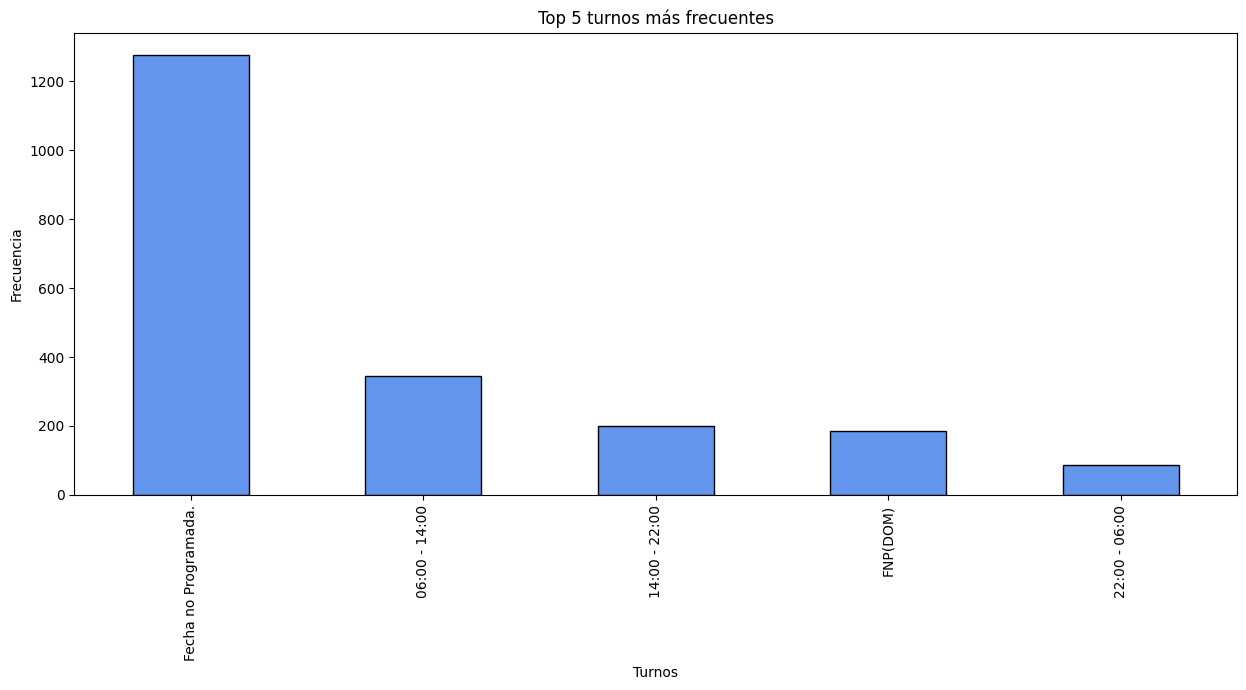

In [ ]:
muestratopt = dfrf['Descripcion'].value_counts()
top_5_frecuentes = muestratopt.head(5)
barra(top_5_frecuentes, title='Top 5 turnos más frecuentes', xlabel='Turnos', ylabel='Frecuencia')

In [ ]:
dfA = dfA.drop(columns=[0])

# Revision de asistencia de empleados
En este punto, se grafican cada uno de los empleados con sus turnos y la cantidad de veces que se registraron en el software.


In [ ]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   IdEmpleado           2514 non-null   float64       
 1   IdEmpresa            2514 non-null   float64       
 2   IdLiquidacion        2514 non-null   float64       
 3   IdTurno              791 non-null    float64       
 4   IdPermiso            9 non-null      float64       
 5   Fecha                2514 non-null   datetime64[ns]
 6   Descripcion          2514 non-null   object        
 7   TipoDeDescripcion    2514 non-null   float64       
 8   MarcacionEntrada     676 non-null    object        
 9   MarcacionSalida      676 non-null    object        
 10  HTRAB                2514 non-null   float64       
 11  HO                   2514 non-null   float64       
 12  HDES                 2514 non-null   float64       
 13  HED                  2514 non-nul

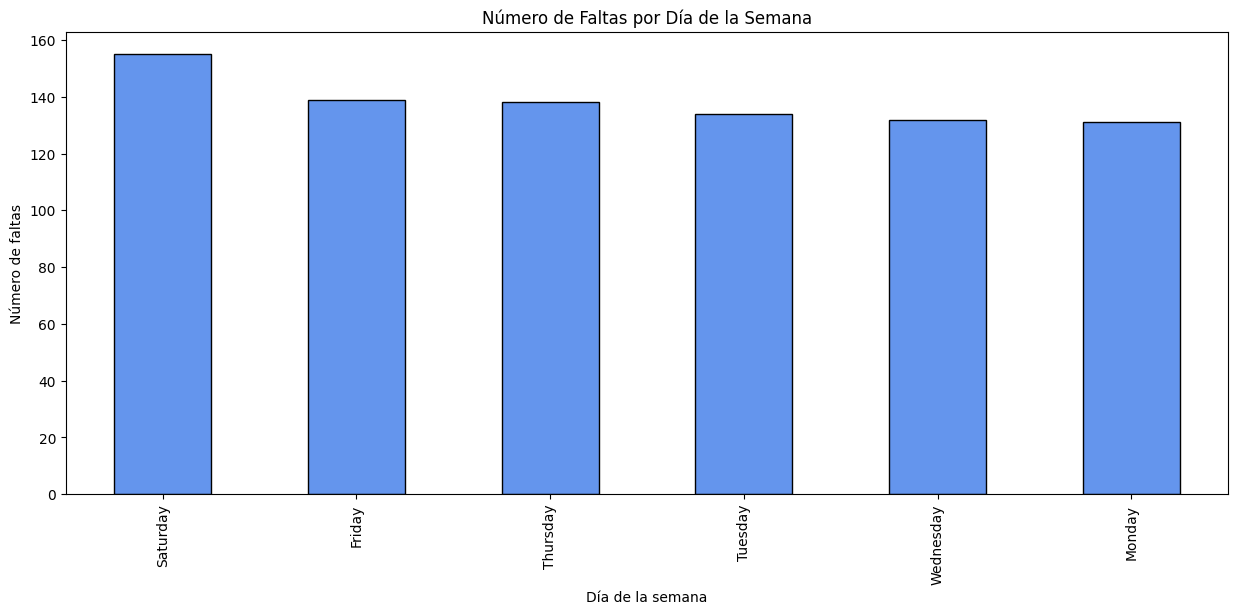

In [ ]:
faltasxdia = dfrf[dfrf['Descripcion'] == 'Fecha no Programada.'].groupby('nombre_dia').size().sort_values(ascending=False)
barra(faltasxdia, title='Número de Faltas por Día de la Semana', xlabel='Día de la semana', ylabel='Número de faltas')

# Distribucion de Horas

En este punto se separaron las horas para poder hacerles sun analisis mas a profundidad ya que son una variable objetivo para este proyecto.

Inicialmente se realizara un grafico general para ver la distribucion de las horas en el total de horas trabajadas.

In [ ]:
dfH = df[["IdEmpleado","HTRAB","HO","HDES","HED","HEN","HEDF","RN","TempDomLab","HRET","HSANT"]]
dfH

,IdEmpleado,HTRAB,HO,HDES,HED,HEN,HEDF,RN,TempDomLab,HRET,HSANT
0,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2580,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2581,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2582,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2583,102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


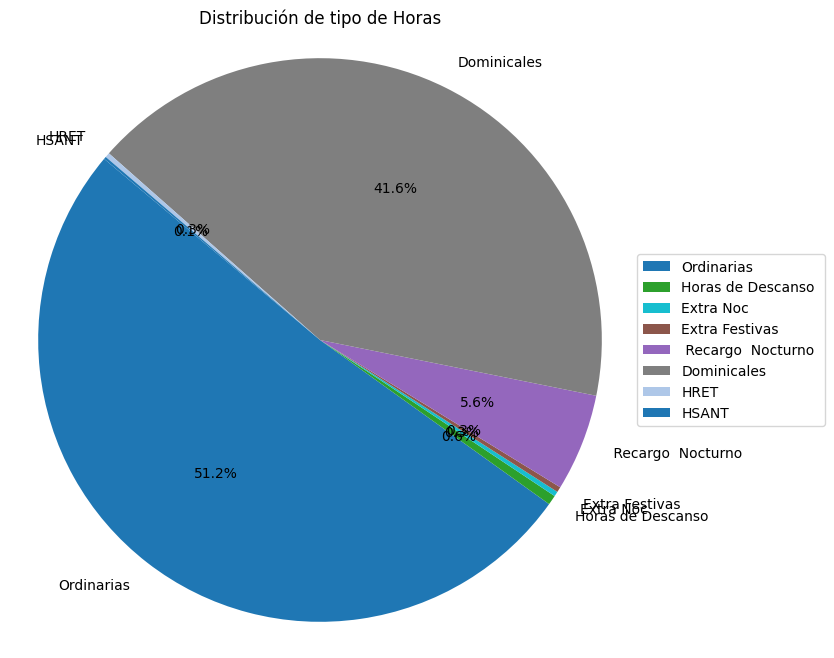

In [ ]:
datos = [dfH['HO'].sum(), dfH['HDES'].sum(),dfH["HEN"].sum(),dfH["HEDF"].sum(),dfH["RN"].sum(),dfH["TempDomLab"].sum(),dfH["HRET"].sum(),dfH["HSANT"].sum()]
etiquetas = ['Ordinarias', 'Horas de Descanso ',"Extra Noc","Extra Festivas"," Recargo  Nocturno","Dominicales","HRET","HSANT"]
colores = ['#1f77b4', '#2ca02c', '#17becf', '#8c564b', '#9467bd', '#7f7f7f','#aec7e8']
circulo(datos,etiquetas,colores)

# Horas trabajadas por empleado

Con este grafico se verifican las horas promedio por turnos trabajadas por empleado.

Ingrese el número de identificación del empleado (52-103): 52


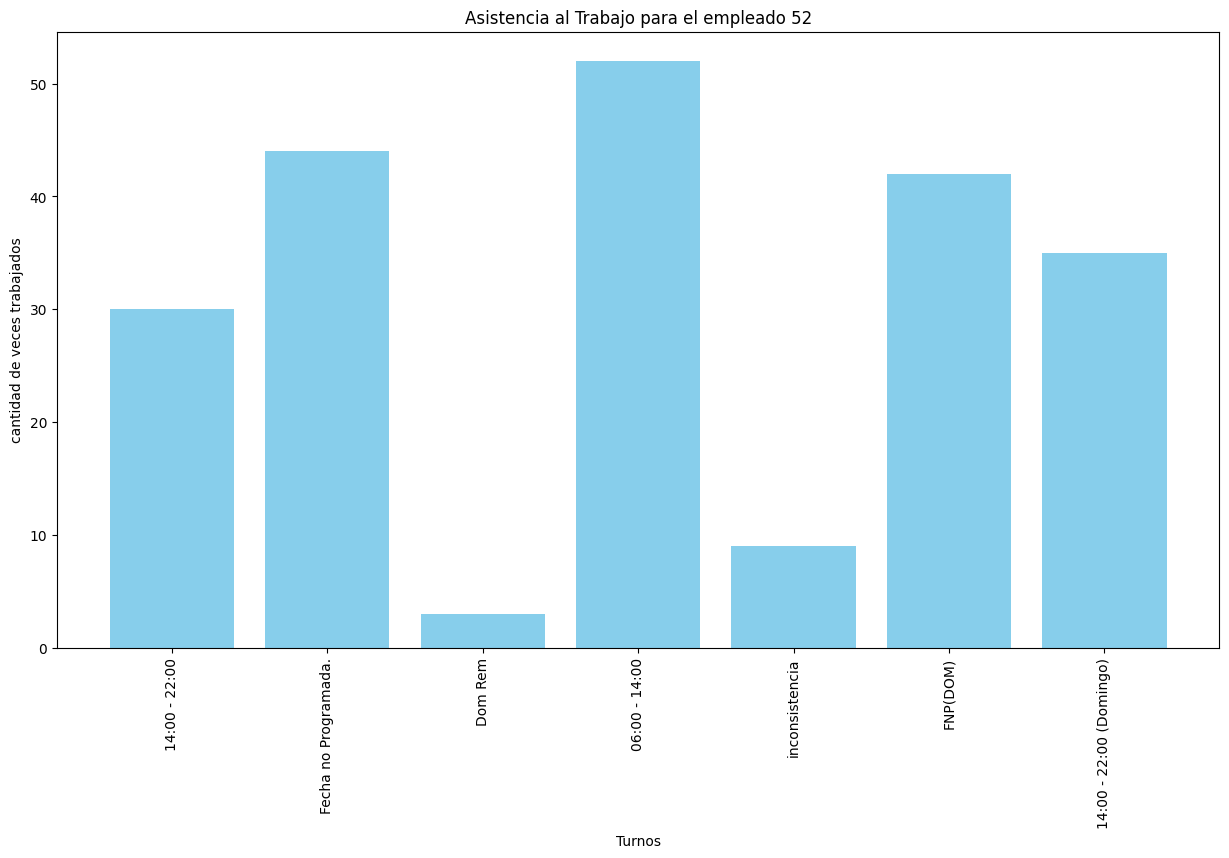

In [ ]:
def graficar_asistencia(numero_persona):
    empleado = dfrf[dfrf['IdEmpleado'] == numero_persona]
    plt.figure(figsize=(15, 8))
    plt.bar(empleado['Descripcion'], range(len(empleado)), color='skyblue')
    plt.title(f'Asistencia al Trabajo para el empleado {numero_persona}')
    plt.xlabel('Turnos')
    plt.ylabel('cantidad de veces trabajados')
    plt.xticks(rotation=90)
    plt.show()

numero_persona = int(input("Ingrese el número de identificación del empleado (52-103): "))

graficar_asistencia(numero_persona)

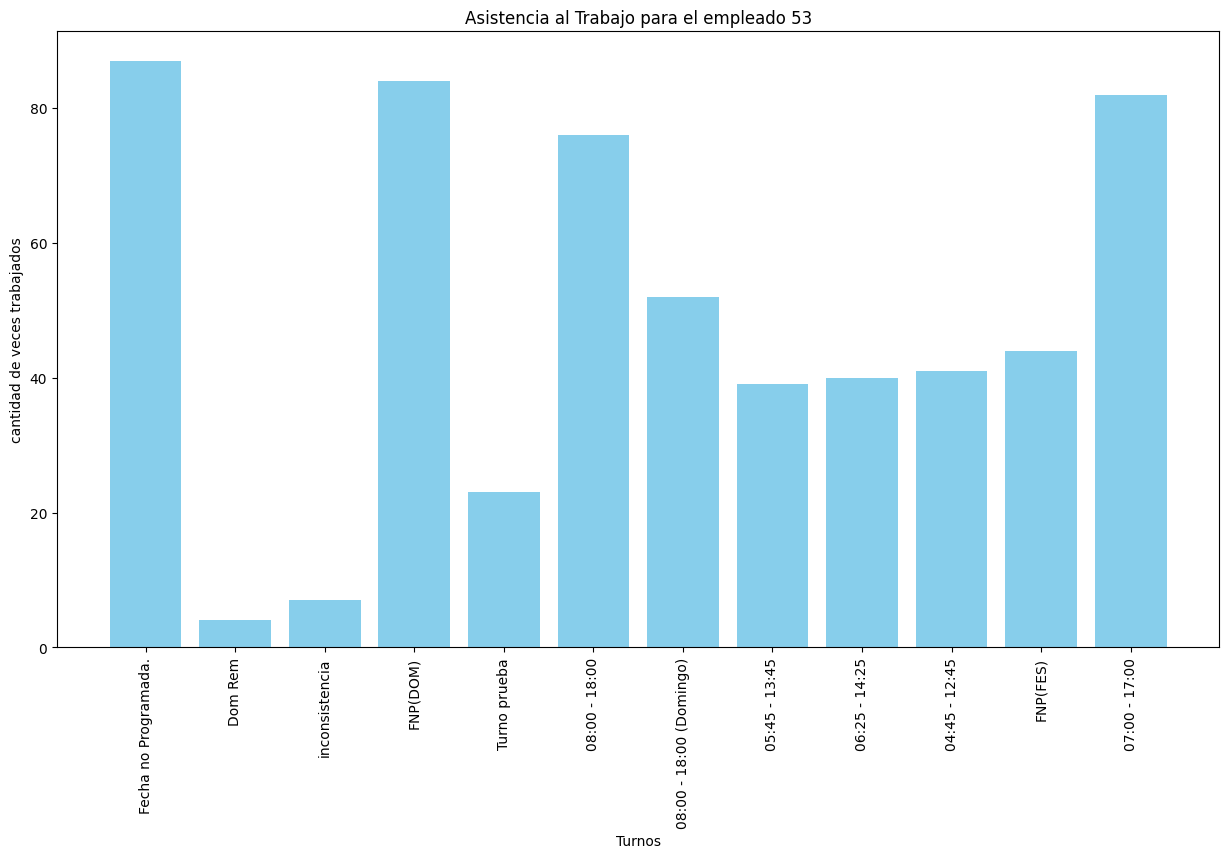

In [ ]:
graficar_asistencia(53)